In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from tqdm import trange

from utils.trading_model import *
from utils.experiment_utils import *
from cvx.covariance.ewma import iterated_ewma, _ewma_cov, _ewma_mean
from cvx.covariance.combination import from_sigmas
sns.set()
sns.set(font_scale=1.5)

%load_ext autoreload
%autoreload 2


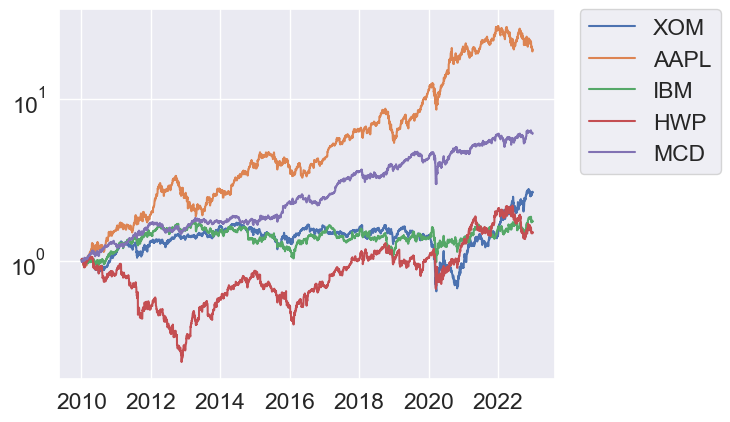

# Import data

In [4]:
returns

,20678,21880,7,21446,21018,20436,20990,21645,20792,20440,...,20908,2367,21188,21384,20288,20017,21576,21401,20483,21177
2010-01-04,0.014078,0.014593,0.015555,0.008082,0.004192,0.029518,0.011841,0.019622,0.021150,0.026887,...,0.018249,0.023529,0.012863,0.007237,0.004528,0.008705,0.031034,0.029567,0.027190,0.005445
2010-01-05,0.003905,-0.009958,0.001729,0.000327,-0.011596,0.019370,-0.012080,-0.004899,0.005178,0.007083,...,0.004194,-0.000479,0.004053,0.012084,0.001803,-0.008079,0.002831,0.000951,0.038235,-0.007646
2010-01-06,0.008643,-0.002235,-0.015906,-0.004743,0.008134,0.005494,-0.006496,-0.014416,-0.005151,0.000126,...,-0.009303,-0.003354,0.013455,-0.010003,-0.028344,0.005553,0.022288,0.007220,0.031162,-0.013644
2010-01-07,-0.003142,0.000560,-0.001849,-0.005423,-0.007137,0.019809,-0.003462,-0.011228,0.051780,-0.003767,...,0.000383,-0.009615,0.001593,-0.006356,-0.005952,0.008284,0.010320,-0.003961,0.002747,0.007323
2010-01-08,-0.004012,-0.005037,0.006648,-0.001322,0.003438,-0.002456,0.010035,-0.007326,0.021538,0.001765,...,0.007471,0.011165,-0.000530,-0.003280,0.000630,0.005112,0.016401,0.008712,-0.016438,-0.000969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.026445,0.002021,-0.002798,0.002825,0.002542,0.004745,0.005466,0.002189,0.000245,0.030916,...,0.003751,0.004621,0.005574,0.006461,0.002610,0.001389,0.031135,0.042958,0.006138,0.006773
2022-12-27,0.013894,0.000278,-0.013878,0.008714,-0.000282,0.003504,0.005436,0.008192,0.012838,0.012571,...,0.011584,-0.005749,0.002324,0.004444,0.021869,0.003605,0.009624,0.012132,0.002937,-0.002728
2022-12-28,-0.016426,-0.017523,-0.030685,-0.012926,-0.004340,0.005465,-0.016852,-0.013001,-0.010502,-0.014753,...,-0.019579,-0.015420,-0.009276,-0.007210,-0.011210,-0.006816,-0.016822,-0.026673,0.005181,-0.006483
2022-12-29,0.007566,0.006087,0.028324,0.004146,0.005094,0.005738,0.007427,0.012624,0.021715,0.007572,...,0.018839,0.026233,-0.002341,0.001265,0.011595,0.022999,0.005894,0.009366,0.012102,0.003093


In [6]:
returns

,20678,21880,7,21446,21018,20436,20990,21645,20792,20440,...,20908,2367,21188,21384,20288,20017,21576,21401,20483,21177
2010-01-04,0.014078,0.014593,0.015555,0.008082,0.004192,0.029518,0.011841,0.019622,0.021150,0.026887,...,0.018249,0.023529,0.012863,0.007237,0.004528,0.008705,0.031034,0.029567,0.027190,0.005445
2010-01-05,0.003905,-0.009958,0.001729,0.000327,-0.011596,0.019370,-0.012080,-0.004899,0.005178,0.007083,...,0.004194,-0.000479,0.004053,0.012084,0.001803,-0.008079,0.002831,0.000951,0.038235,-0.007646
2010-01-06,0.008643,-0.002235,-0.015906,-0.004743,0.008134,0.005494,-0.006496,-0.014416,-0.005151,0.000126,...,-0.009303,-0.003354,0.013455,-0.010003,-0.028344,0.005553,0.022288,0.007220,0.031162,-0.013644
2010-01-07,-0.003142,0.000560,-0.001849,-0.005423,-0.007137,0.019809,-0.003462,-0.011228,0.051780,-0.003767,...,0.000383,-0.009615,0.001593,-0.006356,-0.005952,0.008284,0.010320,-0.003961,0.002747,0.007323
2010-01-08,-0.004012,-0.005037,0.006648,-0.001322,0.003438,-0.002456,0.010035,-0.007326,0.021538,0.001765,...,0.007471,0.011165,-0.000530,-0.003280,0.000630,0.005112,0.016401,0.008712,-0.016438,-0.000969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.026445,0.002021,-0.002798,0.002825,0.002542,0.004745,0.005466,0.002189,0.000245,0.030916,...,0.003751,0.004621,0.005574,0.006461,0.002610,0.001389,0.031135,0.042958,0.006138,0.006773
2022-12-27,0.013894,0.000278,-0.013878,0.008714,-0.000282,0.003504,0.005436,0.008192,0.012838,0.012571,...,0.011584,-0.005749,0.002324,0.004444,0.021869,0.003605,0.009624,0.012132,0.002937,-0.002728
2022-12-28,-0.016426,-0.017523,-0.030685,-0.012926,-0.004340,0.005465,-0.016852,-0.013001,-0.010502,-0.014753,...,-0.019579,-0.015420,-0.009276,-0.007210,-0.011210,-0.006816,-0.016822,-0.026673,0.005181,-0.006483
2022-12-29,0.007566,0.006087,0.028324,0.004146,0.005094,0.005738,0.007427,0.012624,0.021715,0.007572,...,0.018839,0.026233,-0.002341,0.001265,0.011595,0.022999,0.005894,0.009366,0.012102,0.003093


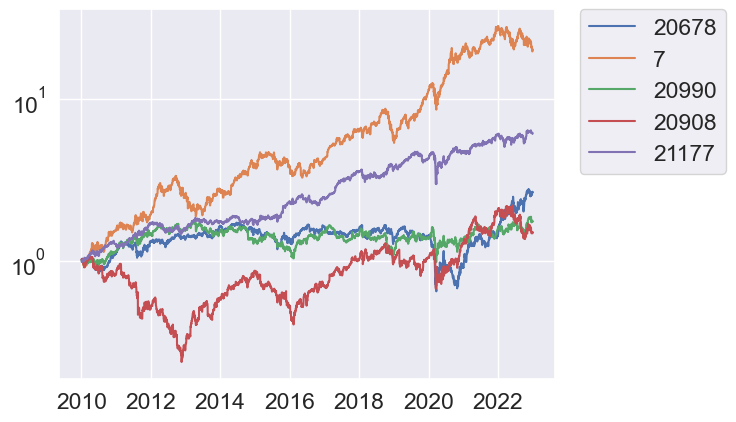

In [13]:
returns = pd.read_csv('data/SP500_top25_adjusted.csv', index_col=0, parse_dates=True)

# Risk-free rate
FF = pd.read_csv('data/ff5.csv', index_col=0, parse_dates=True)
rf_rate = pd.DataFrame(FF.loc[:,"RF"])
rf_rate.index = pd.to_datetime(rf_rate.index, format='%Y%m%d')

# import permco_to_ticker.pkl

permco_to_ticker = pd.read_pickle('data/permco_to_ticker.pkl')
ticker_to_permco = {v: k for k, v in permco_to_ticker.items()}
columns = ["XOM", "AAPL", "IBM", "HWP", "MCD"]
permcos = [str(ticker_to_permco[ticker]) for ticker in columns]
plt.plot((returns[permcos]+1).cumprod(axis=0), label=permcos)
# fix legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.yscale("log");

# Covariance predictors

In [3]:
### Parameters
rw_memory = 250
ewma_halflife=125
iewma_pair = (63,125)
cm_iewma_pairs = [(10, 21), (21, 63), (63, 125), (125, 250), (250, 500)]

In [4]:
# Rolling window 
rw = rolling_window(returns, rw_memory) 

In [5]:
# EWMA
ewma = dict(_ewma_cov(returns, halflife=ewma_halflife))

In [6]:
# IEWMA  
iewma = list(iterated_ewma(returns, vola_halflife=iewma_pair[0], cov_halflife=iewma_pair[1]))
iewma = {iterate.time: iterate.covariance for iterate in iewma}

Next we import the precomputed MGARCH predictors (computed using the rmgarch
package in R). We used the first 250 days for training. Hence the first
predictors is given at day 250, and predicts the covariance matrix for day 251.
(Python uses zero-based indexing, so the first predictor will have time index 249.)

In [7]:
# MGARCH precomputed in R due to computational complexity
# The covariance matrices were computed for 100*r for numerical reasons 

mgarch_cond_cov = pd.read_csv("mgarch_predictors_from_R/stocks/mgarch_stocks_adj.csv", index_col=None)
Sigmas = from_row_matrix_to_covariance(mgarch_cond_cov.values, returns.shape[1]) / 10000

# Remove first year since it was used for training
times = returns.index[249:] 
mgarch = {times[t]: pd.DataFrame(Sigmas[t], index=returns.columns, columns=returns.columns) for t in range(Sigmas.shape[0])}

In [8]:
# CM-IEWMA
iewmas = {f"{pair[0]}-{pair[1]}": list(iterated_ewma(returns, vola_halflife=pair[0], cov_halflife=pair[1], min_periods_vola=63, min_periods_cov=63)) for pair in cm_iewma_pairs}
Sigmas = {key: {item.time: item.covariance for item in iewma} for key, iewma in iewmas.items()}

# Regularize the first covariance matrix
fast = cm_iewma_pairs[0]; fast = f"{fast[0]}-{fast[1]}"
Sigmas[fast] = add_to_diagonal(Sigmas[fast], lamda=0.05)

results = list(from_sigmas(Sigmas, returns, means=None).solve(window=10))

cm_iewma = {result.time: result.covariance for result in results}
weights = {result.time: result.weights for result in results}

In [9]:
# Prescient 
prescient = {}
for t in returns.index:
    # get sample covariance matrix for corresponding quarter
    quarter = (t.month-1)//3 + 1
    cov = np.cov(returns.loc[(returns.index.year == t.year) & (returns.index.quarter == quarter)].values, rowvar=False)
    mean = np.mean(returns.loc[(returns.index.year == t.year) & (returns.index.quarter == quarter)].values, axis=0)
    prescient[t] = pd.DataFrame(cov+np.outer(mean, mean), index=returns.columns, columns=returns.columns)

# Define end and start dates for backtests

In [10]:
# Define start and end of backtest; first two years used for training/burn-in
start_date = pd.to_datetime("2011-12-28", format="%Y-%m-%d")
end_date = pd.to_datetime("2022-12-30", format="%Y-%m-%d")

In [11]:
names = ["RW", "EWMA", "IEWMA", "MGARCH", "CM-IEWMA", "PRESCIENT"]

predictors_temp = [rw, ewma, iewma, mgarch, cm_iewma, prescient]
predictors = []

for predictor in predictors_temp:
    predictors.append({t: predictor[t] for t in predictor.keys() if t >= start_date and t <= end_date})

# CM-IEWMA component weights

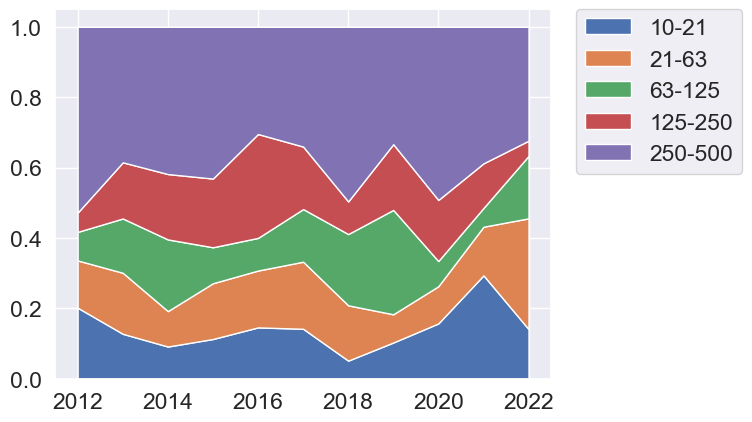

In [16]:
quarterly_weights  = pd.DataFrame(weights).T.resample("Y").mean().loc[start_date:end_date]

plt.stackplot(quarterly_weights.index, quarterly_weights.values.T, labels=[f"{pair[0]}-{pair[1]}" for pair in cm_iewma_pairs])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

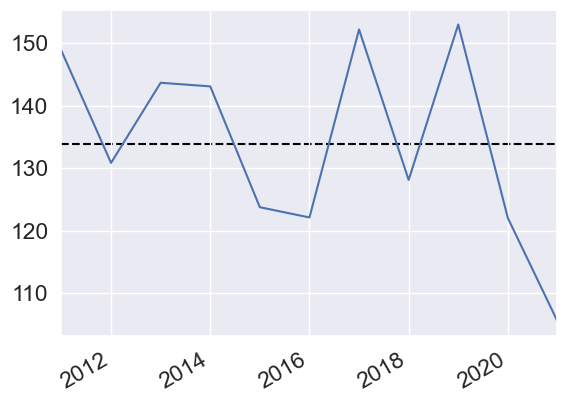

In [17]:
halflifes_vola = np.array([cm_iewma_pairs[i][0] for i in range(len(cm_iewma_pairs))])
(quarterly_weights * halflifes_vola).sum(axis=1).plot()
plt.axhline((quarterly_weights * halflifes_vola).sum(axis=1).mean(), color="black", linestyle="--", label="Mean half-life", zorder=-1);
plt.gcf().autofmt_xdate()

# MSEs

In [13]:
for i, predictior in enumerate(predictors):
    MSE_temp = MSE(returns, predictior).resample("Q").mean()

    print("\n" + names[i])
    print(f"mean: {MSE_temp.mean():.6f}")
    print(f"std: {MSE_temp.std():.6f}")
    print(f"max: {MSE_temp.max():.6f}")


RW
mean: 0.000336
std: 0.001622
max: 0.010913

EWMA
mean: 0.000329
std: 0.001607
max: 0.010813

IEWMA
mean: 0.000324
std: 0.001580
max: 0.010626

MGARCH
mean: 0.000298
std: 0.001432
max: 0.009628

CM-IEWMA
mean: 0.000292
std: 0.001394
max: 0.009372

PRESCIENT
mean: 0.000298
std: 0.001454
max: 0.009774


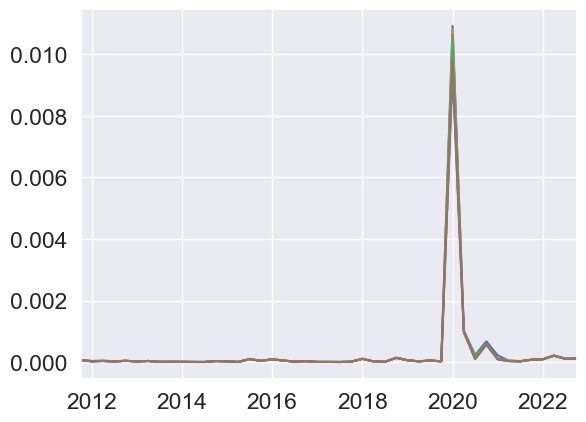

In [14]:
plt.figure()
for i, predictior in enumerate(predictors):
    MSE_temp = MSE(returns, predictior).resample("Q").mean()
    MSE_temp.plot()

# Log likelihoods

In [18]:
log_likelihoods = {}

for i, predictor in enumerate(predictors):
    print("Computing " + names[i] + " log-likelihood...")
    returns_temp = returns.loc[pd.Series(predictor).index].values[1:]
    times = pd.Series(predictor).index[1:]
    Sigmas_temp = np.stack([predictor[t].values for t in predictor.keys()])[:-1]

    log_likelihoods[names[i]] = pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times)

regrets = {}
for name in log_likelihoods:
    regrets[name] =  log_likelihoods["PRESCIENT"] - log_likelihoods[name]

Computing RW log-likelihood...
Computing EWMA log-likelihood...
Computing IEWMA log-likelihood...
Computing MGARCH log-likelihood...
Computing CM-IEWMA log-likelihood...
Computing PRESCIENT log-likelihood...


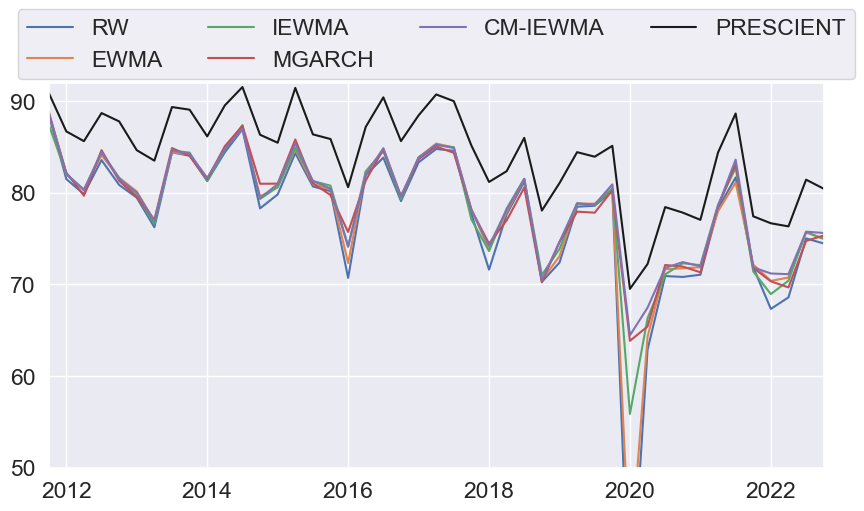

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for name in names:
    if name == 'PRESCIENT':
        log_likelihoods[name].resample("Q").mean().plot(label=name, c="k")
    else:
        log_likelihoods[name].resample("Q").mean().plot(label=name)
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='center', ncols=4, labels=names, scatterpoints=1, markerscale=5);
plt.ylim(50,92);

# Regrets

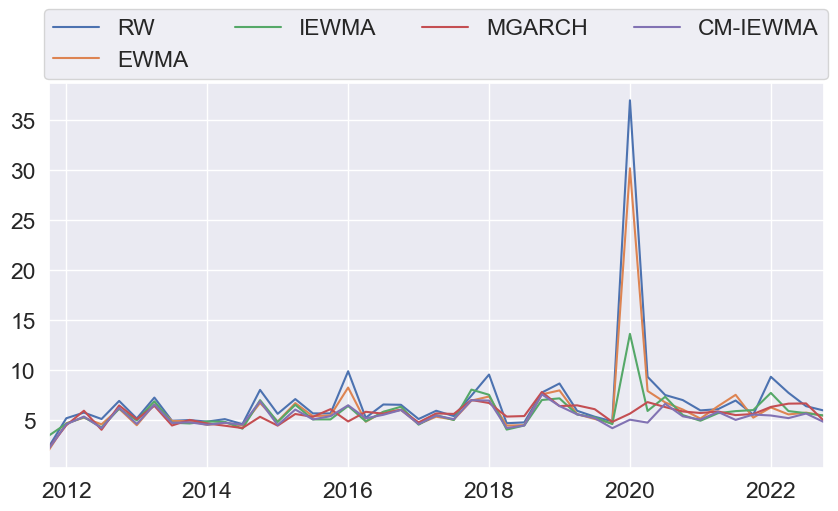

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for name in names:
    if name == 'PRESCIENT':
        pass
    else:
        regrets[name].resample("Q").mean().plot(label=name)
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='center', ncols=4, labels=names[:-1], scatterpoints=1, markerscale=5);


### Compare CM-IEWMA with MGARCH

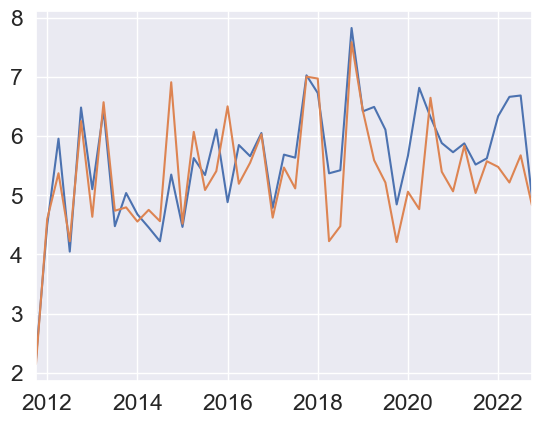

In [21]:
regret_mgarch = regrets["MGARCH"].resample("Q").mean()
regret_cm_iewma = regrets["CM-IEWMA"].resample("Q").mean()

regret_mgarch.plot(label="MGARCH")
regret_cm_iewma.plot(label="CM-IEWMA");
# plt.legend();

In [22]:
cm_iewma_advantage = (regret_cm_iewma - regret_mgarch < 0).mean()
print(f"CM-IEWMA is better than MGARCH {cm_iewma_advantage:.0%} of the time")

CM-IEWMA is better than MGARCH 71% of the time


### Regret CDF plots

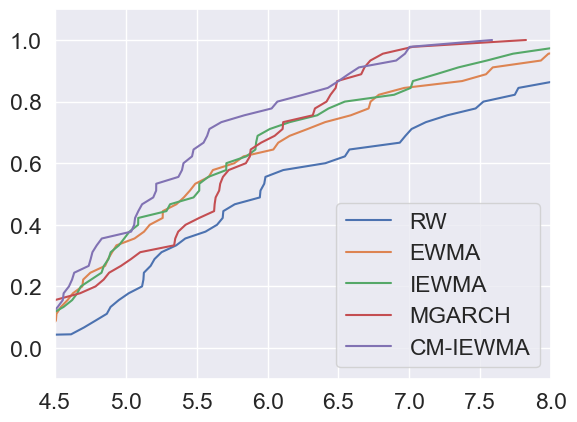

In [23]:
for name in log_likelihoods:
    if name != "PRESCIENT":
        data = regrets[name].resample("Q").mean().values
        x, y = ecdf(data)
        plt.plot(x, y, label=name)
plt.xlim(4.5,8)
plt.ylim(-0.1,1.1)
plt.legend();

### Regret metrics

In [24]:
print("\\begin{tabular}{lccccc}")
print("   \\toprule")
print("   Predictor & Average & Std.~dev. & Max \\\\")
print("   \\midrule")

for name in regrets:
    if name != "PRESCIENT":
        print("   {}".format(name), end=" & ")
        regret = regrets[name].resample("Q").mean()
        metrics = (np.mean(regret).round(1), np.std(regret).round(1), np.max(regret).round(1))
        print("{} & {} & {} \\\\".format(metrics[0], metrics[1], metrics[2]))

print("   \\hline")
print("   PRESCIENT & 0.0 & 0.0 & 0.0 \\\\")
print("   \\bottomrule")
print("\\end{tabular}")


\begin{tabular}{lccccc}
   \toprule
   Predictor & Average & Std.~dev. & Max \\
   \midrule
   RW & 7.0 & 4.8 & 37.0 \\
   EWMA & 6.2 & 3.8 & 30.2 \\
   IEWMA & 5.8 & 1.6 & 13.6 \\
   MGARCH & 5.6 & 1.0 & 7.8 \\
   CM-IEWMA & 5.3 & 1.0 & 7.6 \\
   \hline
   PRESCIENT & 0.0 & 0.0 & 0.0 \\
   \bottomrule
\end{tabular}


# Portfolio optimization

In [12]:
from cvx.backtest.portfolios import *

# Risk-free rate for backtest period; for cash allocation end_date removed since
# it is removed in returns (in shift(-1)) to make predictors causal
rf = rf_rate.loc[start_date:end_date].iloc[:-1]

# Portfolio paramaters
additonal_cons={"short_lim":1.6, "upper_bound":0.15,\
             "lower_bound":-0.1}
sigma_tar = 0.1
excess = True

### Equally weighted

In [20]:
traders_eq_w = EqWeighted(returns, predictors, names, start_date, end_date).backtest()

100%|██████████| 6/6 [00:02<00:00,  2.02it/s]


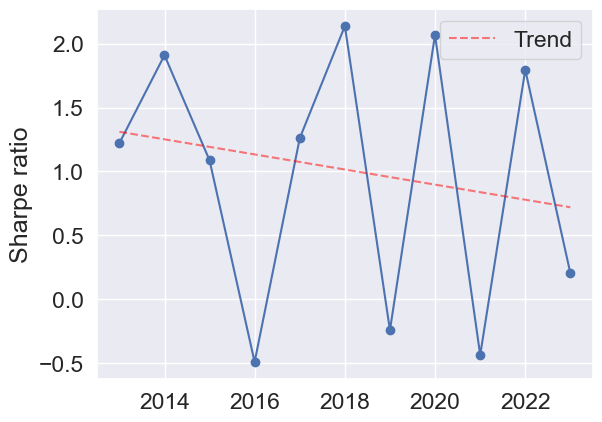

In [48]:
trader = traders_eq_w["CM-IEWMA"]
SRs = yearly_SR(trader)

In [23]:
create_table(traders_eq_w, sigma_tar, rf, excess)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   RW-250 & 6.8\% & 10.6\% & 0.6 & 23\% \\
   EWMA-125 & 6.4\% & 10.0\% & 0.6 & 21\% \\
   IEWMA-63-125 & 6.7\% & 10.1\% & 0.7 & 20\% \\
   MGARCH & 7.2\% & 9.4\% & 0.8 & 15\% \\
   CM-IEWMA & 6.8\% & 9.6\% & 0.7 & 17\% \\
   \hline
   PRESCIENT & 12.8\% & 9.9\% & 1.3 & 10\% \\
   \bottomrule
\end{tabular}


### Minimum risk

In [29]:
traders_min_risk = MinRisk(returns, [predictors[-2]], [names[-2]], start_date, end_date).backtest(additonal_cons)

100%|██████████| 1/1 [00:08<00:00,  8.19s/it]


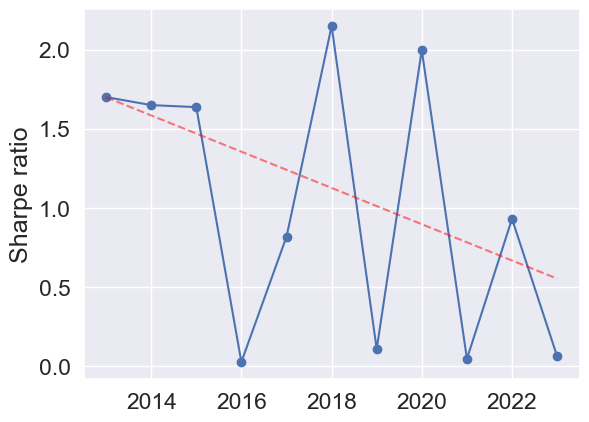

In [49]:
trader = traders_min_risk["CM-IEWMA"]
SRs = yearly_SR(trader)
plt.legend().remove()

In [25]:
create_table(traders_min_risk, sigma_tar, rf, excess)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   RW-250 & 9.7\% & 12.0\% & 0.8 & 23\% \\
   EWMA-125 & 8.9\% & 11.1\% & 0.8 & 20\% \\
   IEWMA-63-125 & 9.7\% & 11.3\% & 0.9 & 19\% \\
   MGARCH & 11.3\% & 12.3\% & 0.9 & 18\% \\
   CM-IEWMA & 9.1\% & 11.0\% & 0.8 & 15\% \\
   \hline
   PRESCIENT & 15.6\% & 10.0\% & 1.6 & 10\% \\
   \bottomrule
\end{tabular}


### Maximum diversification 

In [26]:
traders_max_diverse = MaxDiverse(returns, predictors, names, start_date, end_date).backtest(additonal_cons)

100%|██████████| 6/6 [00:49<00:00,  8.17s/it]


In [27]:
create_table(traders_max_diverse, sigma_tar, rf, excess)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   RW-250 & 8.4\% & 11.2\% & 0.8 & 22\% \\
   EWMA-125 & 7.9\% & 10.4\% & 0.8 & 21\% \\
   IEWMA-63-125 & 8.2\% & 10.4\% & 0.8 & 20\% \\
   MGARCH & 10.0\% & 9.8\% & 1.0 & 15\% \\
   CM-IEWMA & 8.8\% & 10.0\% & 0.9 & 16\% \\
   \hline
   PRESCIENT & 13.5\% & 9.9\% & 1.4 & 11\% \\
   \bottomrule
\end{tabular}


### Risk parity 

In [28]:
traders_risk_par = RiskParity(returns, predictors, names, start_date, end_date).backtest()

100%|██████████| 6/6 [00:52<00:00,  8.77s/it]


In [29]:
create_table(traders_risk_par, sigma_tar, rf, excess)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   RW-250 & 7.4\% & 10.8\% & 0.7 & 22\% \\
   EWMA-125 & 6.8\% & 10.1\% & 0.7 & 21\% \\
   IEWMA-63-125 & 7.2\% & 10.2\% & 0.7 & 20\% \\
   MGARCH & 7.9\% & 9.7\% & 0.8 & 15\% \\
   CM-IEWMA & 7.4\% & 9.7\% & 0.8 & 16\% \\
   \hline
   PRESCIENT & 14.3\% & 9.9\% & 1.5 & 9\% \\
   \bottomrule
\end{tabular}


### Mean variance

In [14]:
def tune_returns(returns):
    """
    Cuts element in each row at its 40th and 60th percentile
    up and down
    """
    
    returns_tuned = np.zeros_like(returns)

    for t in range(returns.shape[0]):
        r_temp = returns.iloc[t]
        returns_tuned[t] = np.clip(r_temp, a_min=r_temp.quantile(0.4), a_max=r_temp.quantile(0.6))

    return pd.DataFrame(returns_tuned, index=returns.index, columns=returns.columns)

In [16]:
from experiments.utils.portfolio_backtests import MeanVariance

r_hat_ewma = pd.DataFrame(dict(_ewma_mean(returns, halflife=250))).T
r_hat_ewma = tune_returns(r_hat_ewma)

mean_predictors = [r_hat_ewma for name in names]

traders_mean_var = MeanVariance(returns, predictors, names, mean_predictors=mean_predictors, start_date=start_date, end_date=end_date).backtest(additonal_cons, sigma_tar)

100%|██████████| 6/6 [01:45<00:00, 17.51s/it]


In [17]:
create_table(traders_mean_var, None, rf, excess, prescient=True)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   RW & 6.1\% & 11.9\% & 0.5 & 26\% \\
   EWMA & 5.9\% & 11.0\% & 0.5 & 20\% \\
   IEWMA & 7.9\% & 11.1\% & 0.7 & 15\% \\
   MGARCH & 8.3\% & 11.9\% & 0.7 & 18\% \\
   CM-IEWMA & 7.3\% & 10.9\% & 0.7 & 13\% \\
   \hline
   PRESCIENT & 14.3\% & 9.9\% & 1.4 & 9\% \\
   \bottomrule
\end{tabular}


In [18]:
from experiments.utils.portfolio_backtests import MeanVariance

r_hat_ewma = pd.DataFrame(dict(_ewma_mean(returns, halflife=250))).T
r_hat_ewma = tune_returns(r_hat_ewma)
mean_predictors = [r_hat_ewma for name in names]

traders_mean_var = MeanVariance(returns, predictors, names, mean_predictors=mean_predictors, start_date=start_date, end_date=end_date).backtest(additonal_cons, sigma_tar)

100%|██████████| 6/6 [02:32<00:00, 25.45s/it]


In [19]:
create_table(traders_mean_var, None, rf, excess, prescient=True)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   RW & 6.1\% & 11.9\% & 0.5 & 26\% \\
   EWMA & 5.9\% & 11.0\% & 0.5 & 20\% \\
   IEWMA & 7.9\% & 11.1\% & 0.7 & 15\% \\
   MGARCH & 8.3\% & 11.9\% & 0.7 & 18\% \\
   CM-IEWMA & 7.3\% & 10.9\% & 0.7 & 13\% \\
   \hline
   PRESCIENT & 14.3\% & 9.9\% & 1.4 & 9\% \\
   \bottomrule
\end{tabular}


In [48]:
create_table(traders_mean_var, None, rf, excess, prescient=False)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   clip & 5.0\% & 11.0\% & 0.5 & 22\% \\
   \hline
   \bottomrule
\end{tabular}


In [46]:
create_table(traders_mean_var, None, rf, excess, prescient=False)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   clip & 7.3\% & 10.9\% & 0.7 & 13\% \\
   \hline
   \bottomrule
\end{tabular}


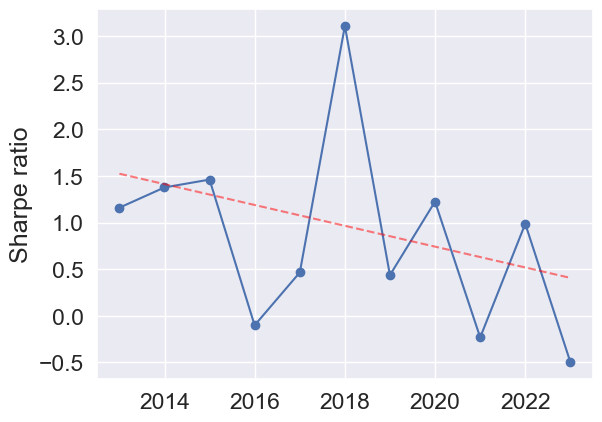

In [21]:
trader = traders_mean_var["CM-IEWMA"]
trader.returns = trader.R
SRs = yearly_SR(trader)
plt.legend().remove()

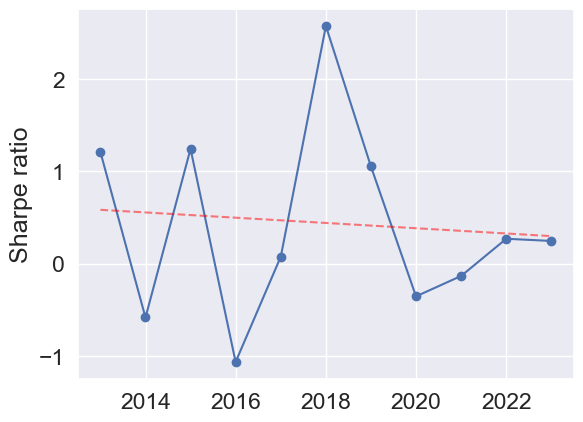

In [13]:
# 63 day halfife
trader = traders_mean_var["No clip"]
SRs = yearly_SR(trader)
plt.legend().remove()

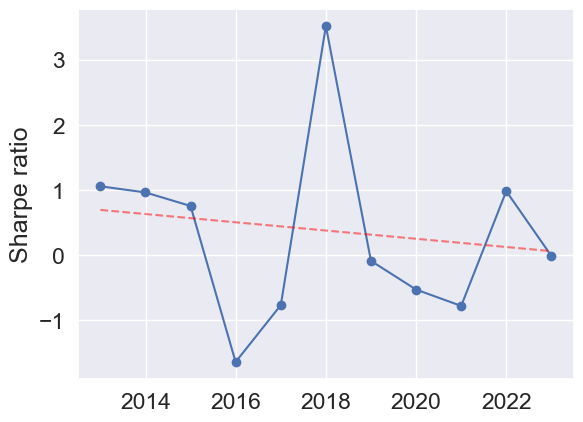

In [14]:
# 63 day halfife
trader = traders_mean_var["clip"]
SRs = yearly_SR(trader)
plt.legend().remove()

In [12]:
# 63 day half-life
create_table(traders_mean_var, None, rf, excess, prescient=False)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   No clip & 3.5\% & 10.9\% & 0.3 & 19\% \\
   clip & 1.4\% & 10.9\% & 0.1 & 30\% \\
   \hline
   \bottomrule
\end{tabular}


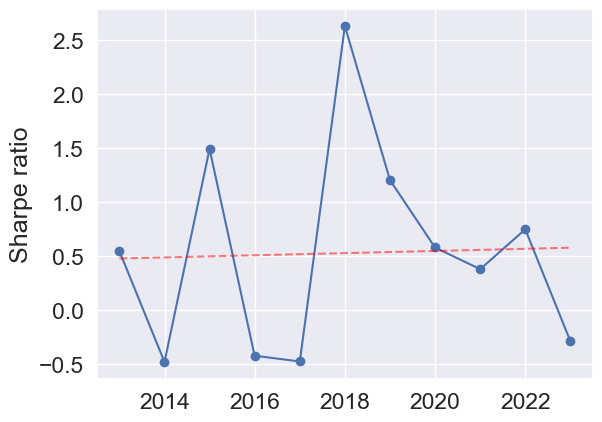

In [17]:
# 250 day halfife
trader = traders_mean_var["No clip"]
SRs = yearly_SR(trader)
plt.legend().remove()

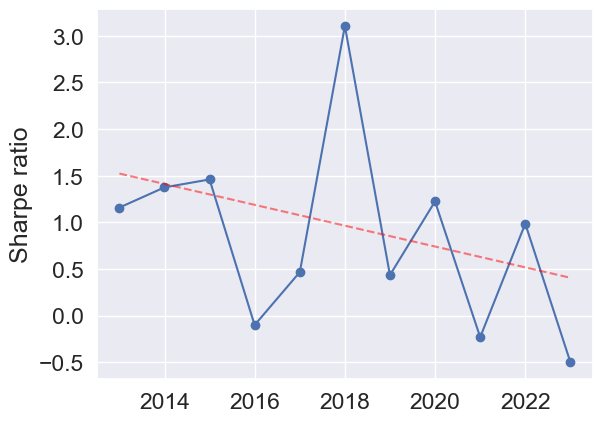

In [18]:
# 250 day halfife
trader = traders_mean_var["clip"]
SRs = yearly_SR(trader)
plt.legend().remove()

In [16]:
# 250 day half-life
create_table(traders_mean_var, None, rf, excess, prescient=False)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   No clip & 4.9\% & 11.2\% & 0.4 & 19\% \\
   clip & 7.3\% & 10.9\% & 0.7 & 13\% \\
   \hline
   \bottomrule
\end{tabular}


In [26]:
# 250 day half-life clip at 70th and 30th percentile
create_table(traders_mean_var, None, rf, excess, prescient=False)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   No clip & 4.9\% & 11.2\% & 0.4 & 19\% \\
   clip & 5.7\% & 10.9\% & 0.5 & 13\% \\
   \hline
   \bottomrule
\end{tabular}


In [31]:
create_table(traders_mean_var, None, rf, excess)

\begin{tabular}{lcccc}
   \toprule
   {Predictor} & {Return} & {Risk} & {Sharpe} & {Drawdown} \\
   \midrule
   RW-250 & 2.9\% & 11.7\% & 0.2 & 27\% \\
   EWMA-125 & 2.6\% & 11.2\% & 0.2 & 25\% \\
   IEWMA-63-125 & 3.2\% & 10.9\% & 0.3 & 23\% \\
   MGARCH & 2.3\% & 11.1\% & 0.2 & 21\% \\
   CM-IEWMA & 3.5\% & 10.9\% & 0.3 & 19\% \\
   \hline
   PRESCIENT & 5.6\% & 9.3\% & 0.6 & 16\% \\
   \bottomrule
\end{tabular}
